In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('../datasets/ds_salaries.csv')

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Use a box plot to visualize the distribution of each numerical variable. Box plots are great for identifying outliers as they show the distribution of data along with any potential outliers.

And as from the above description we can already see that we'll find outliers in `salary*` columns.

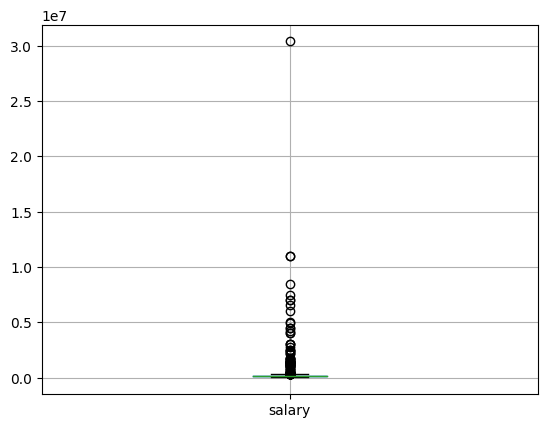

In [10]:
df.boxplot(column=['salary'])
plt.show()

Create scatter plots for numerical variables that may have a relationship with potential outliers. Scatter plots can help identify any data points that deviate significantly from the general trend.

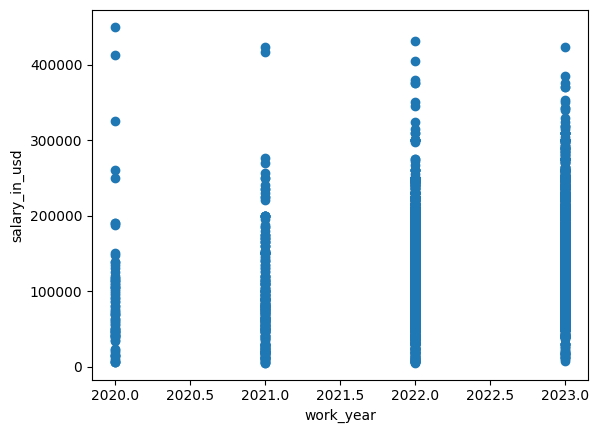

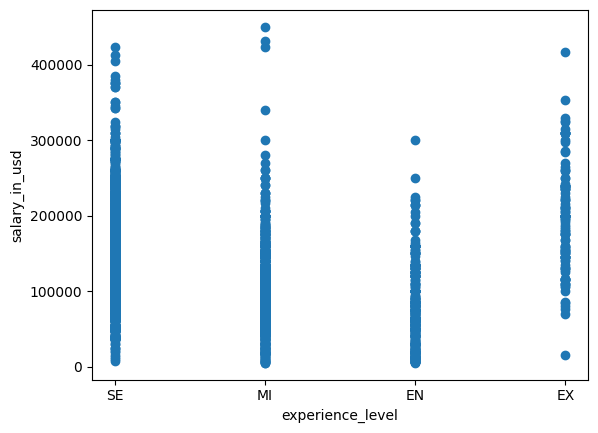

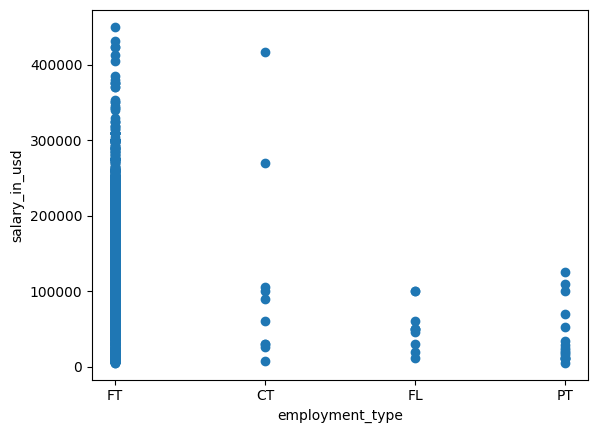

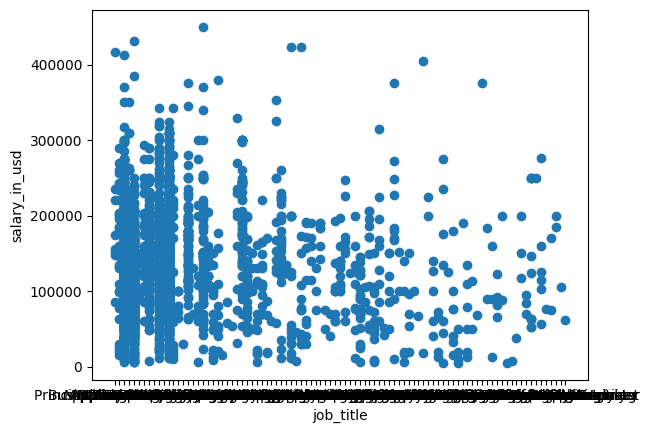

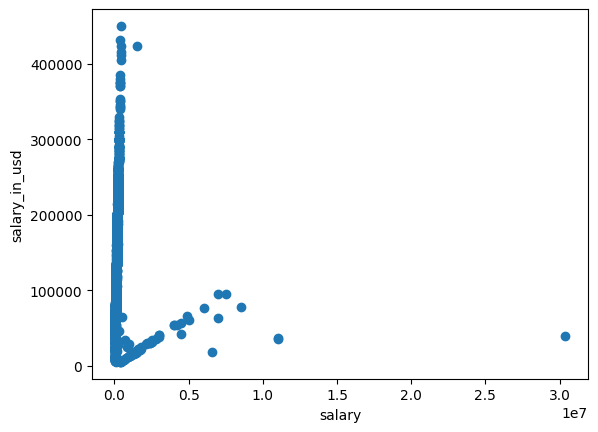

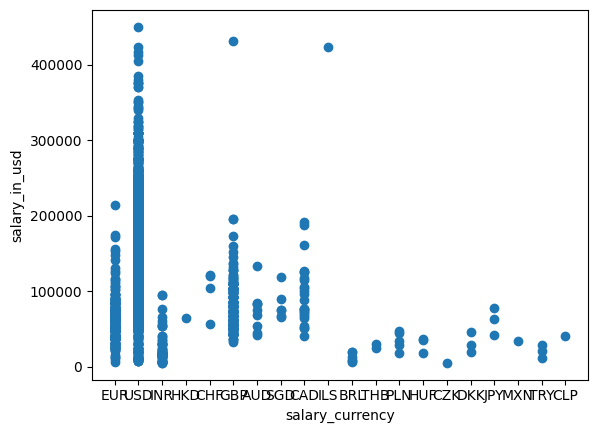

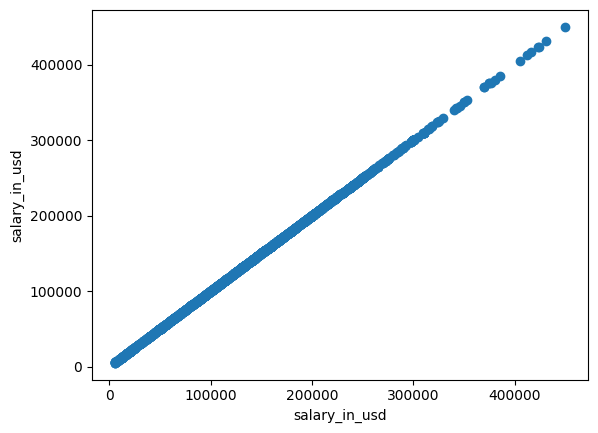

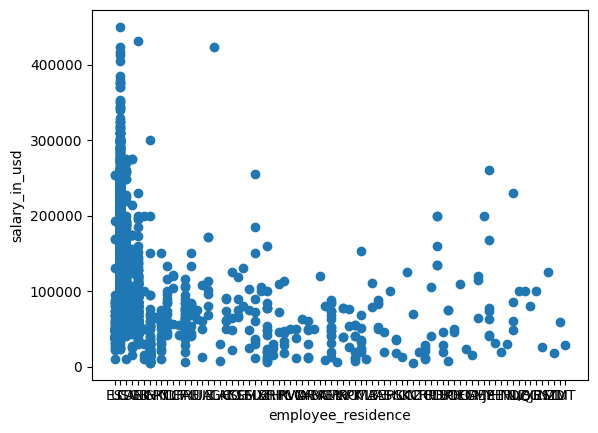

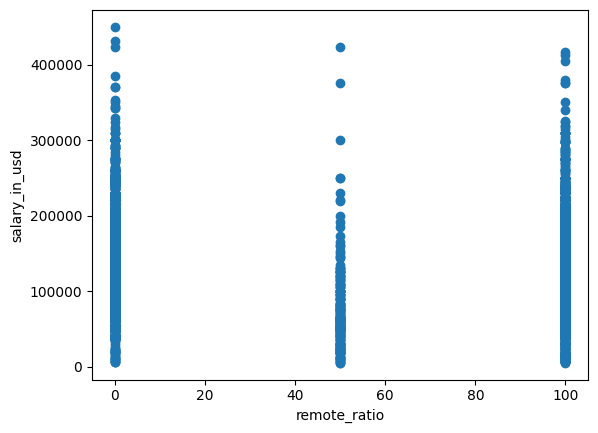

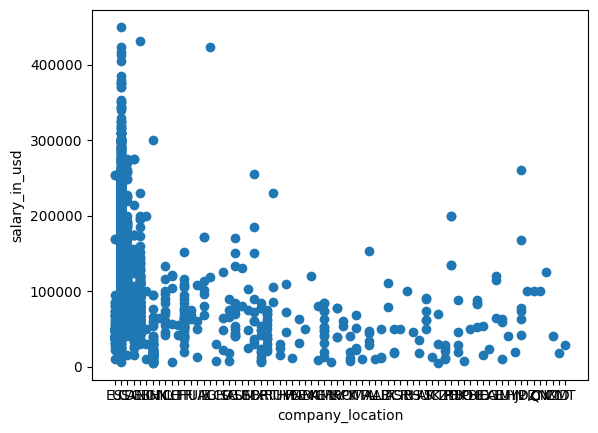

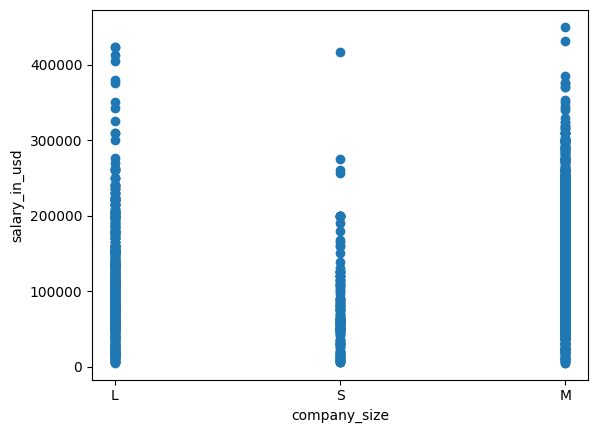

In [11]:
for cn in df.columns:
  plt.scatter(df[cn], df['salary_in_usd'])
  plt.xlabel(cn)
  plt.ylabel('salary_in_usd')
  plt.show()

Calculate the Z-Score for each numerical variable to identify outliers. Z-Score measures how many standard deviations a data point is away from the mean. Data points with Z-Scores greater than a threshold value (e.g., 3 or -3) can be considered outliers.

In [12]:
from scipy import stats

In [13]:
z_scores = stats.zscore(df['salary_in_usd'])
outliers = df[abs(z_scores) > 3]
outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L
228,2023,EX,FT,Head of Data,329500,USD,329500,US,0,US,M
478,2023,EX,FT,Director of Data Science,353200,USD,353200,US,0,US,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M
845,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M
1105,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M
1258,2022,SE,FT,Machine Learning Software Engineer,375000,USD,375000,US,100,US,M
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M


There's also the Interquartile Range (IQR) method to identify outliers. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Data points outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR are considered outliers.

In [14]:
# Calculate IQR for the 'salary' column
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = df[(df['salary'] < Q1 - 1.5 * IQR) | (df['salary'] > Q3 + 1.5 * IQR)]
outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
41,2022,MI,FT,Machine Learning Engineer,1650000,INR,20984,IN,50,IN,L
68,2023,SE,FT,Applied Scientist,309400,USD,309400,US,0,US,L
80,2023,MI,FT,Data Scientist,510000,HKD,65062,HK,0,HK,L
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,318300,USD,318300,US,100,US,M
156,2023,MI,FT,Applied Data Scientist,1700000,INR,20670,IN,100,IN,L
163,2023,SE,FT,Applied Scientist,309400,USD,309400,US,0,US,L
217,2023,EN,FT,Data Engineer,1400000,INR,17022,IN,100,IN,L
228,2023,EX,FT,Head of Data,329500,USD,329500,US,0,US,M


Plot the identified outliers on the scatter plot or box plot to visualize their positions in the dataset.

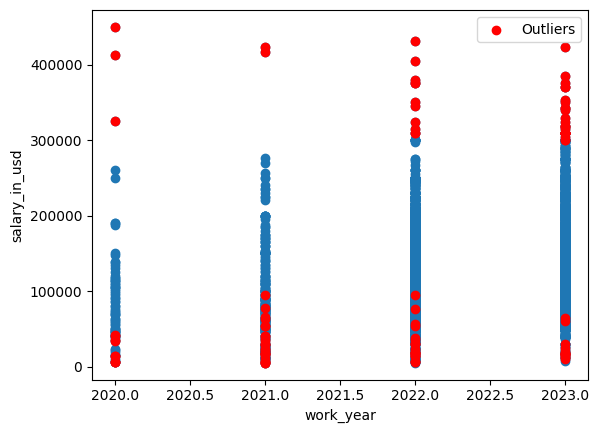

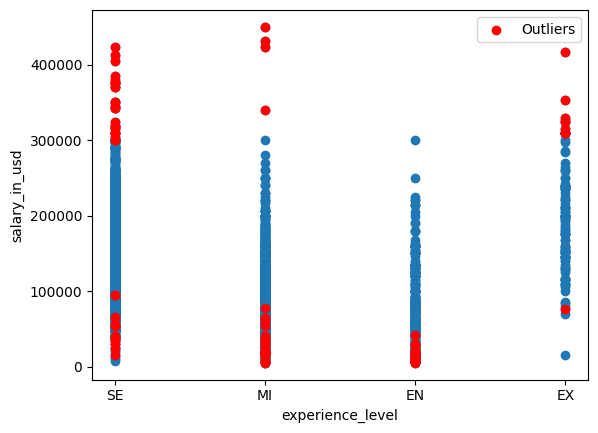

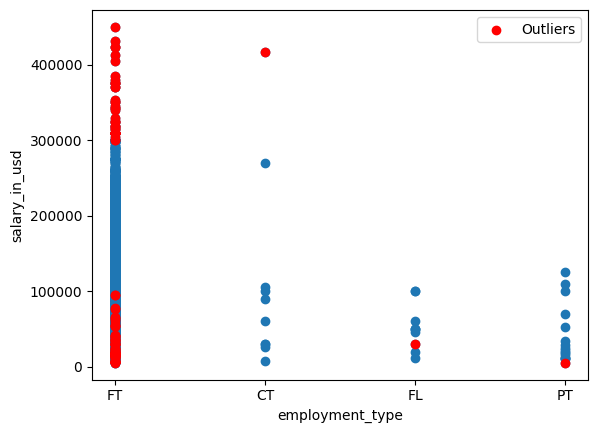

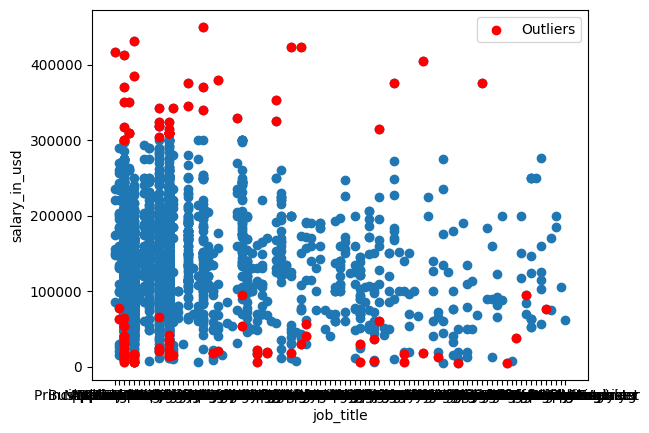

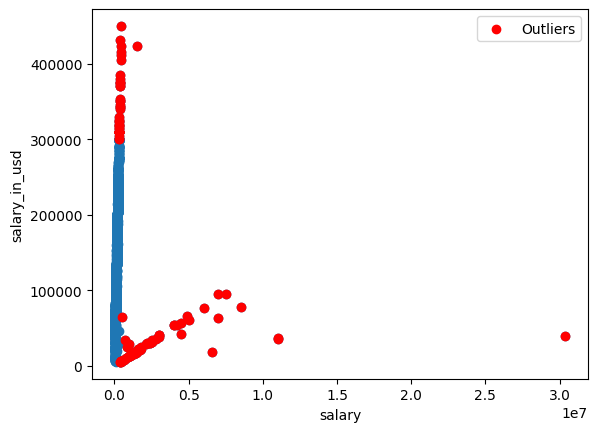

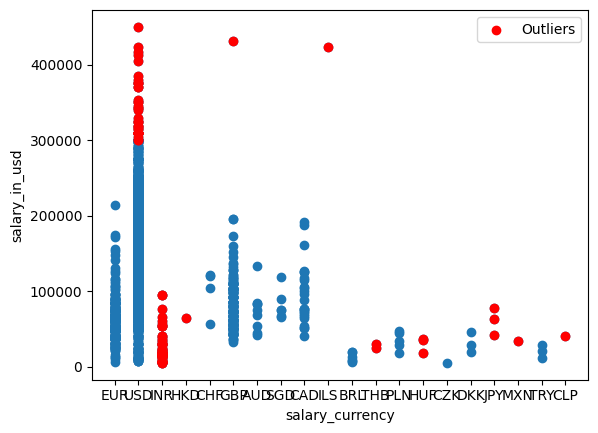

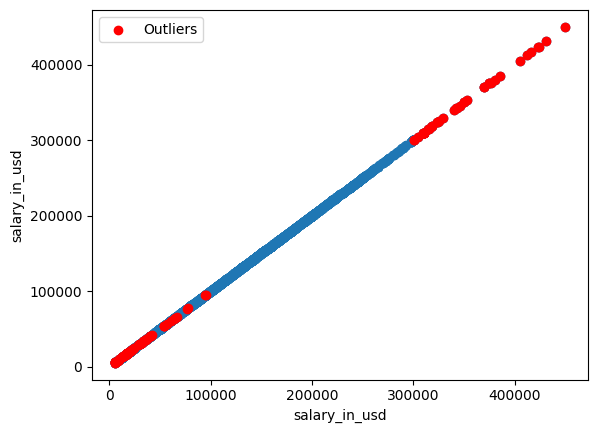

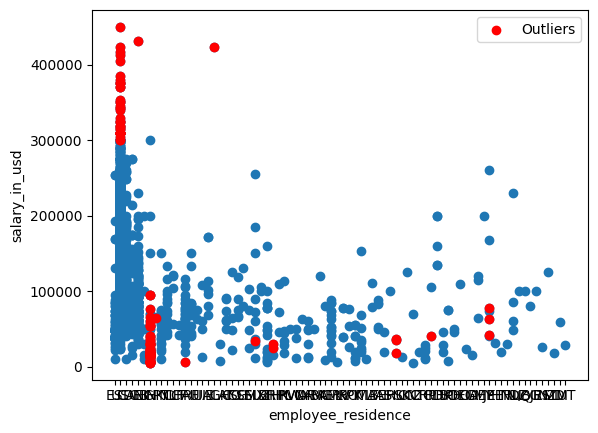

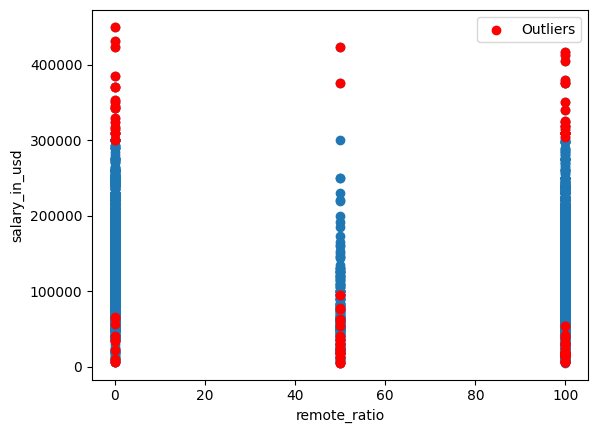

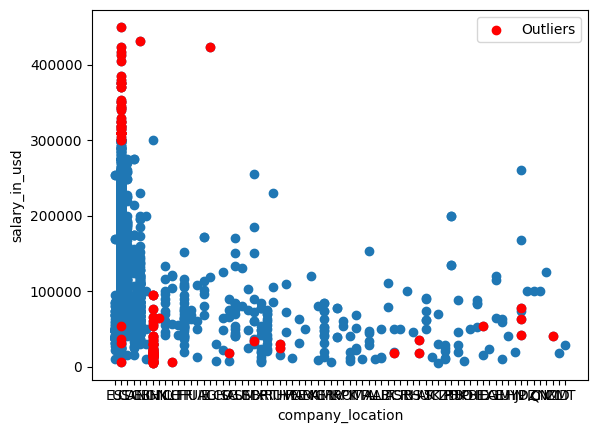

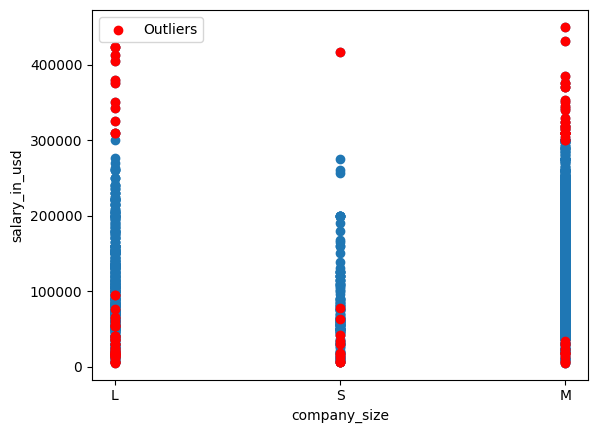

In [15]:
for cn in df.columns:
  # Scatter plot with identified outliers
  plt.scatter(df[cn], df['salary_in_usd'])
  plt.scatter(outliers[cn], outliers['salary_in_usd'], color='red', label='Outliers')
  plt.xlabel(cn)
  plt.ylabel('salary_in_usd')
  plt.legend()
  plt.show()

Use histograms to visualize the distribution of numerical variables.

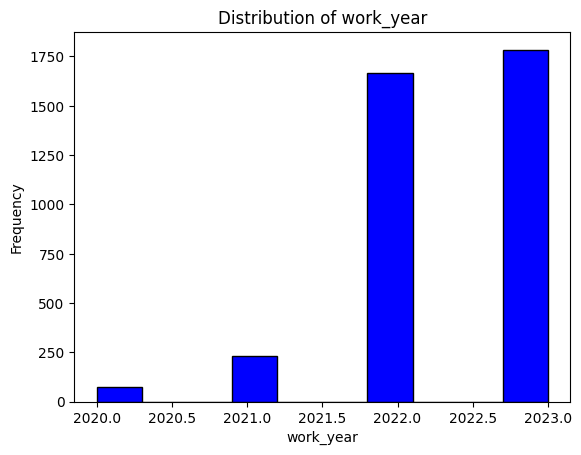

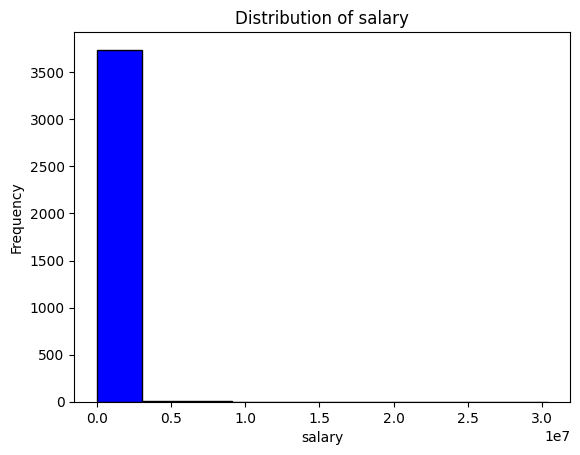

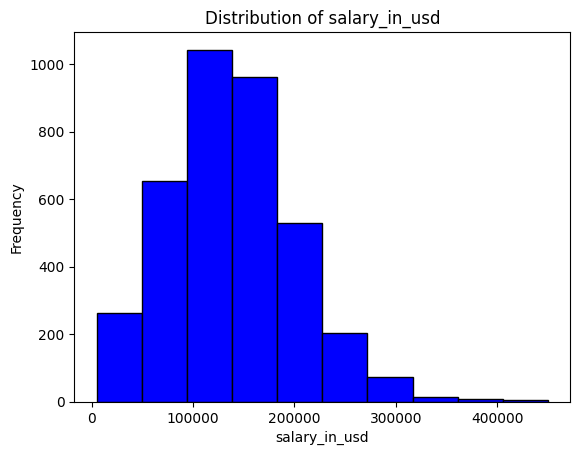

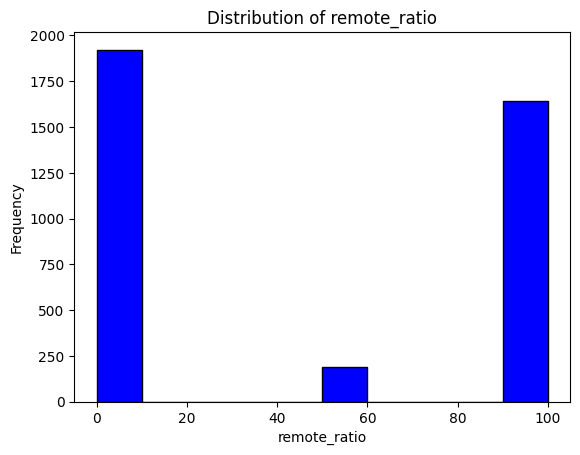

In [16]:
for cn in df.select_dtypes(include=[pd.Int64Dtype()]).columns:
  plt.hist(df[cn], bins=10, color='blue', edgecolor='black')
  plt.xlabel(cn)
  plt.ylabel('Frequency')
  plt.title('Distribution of {}'.format(cn))
  plt.show()

Use bar plots to visualize the distribution of categorical variables.

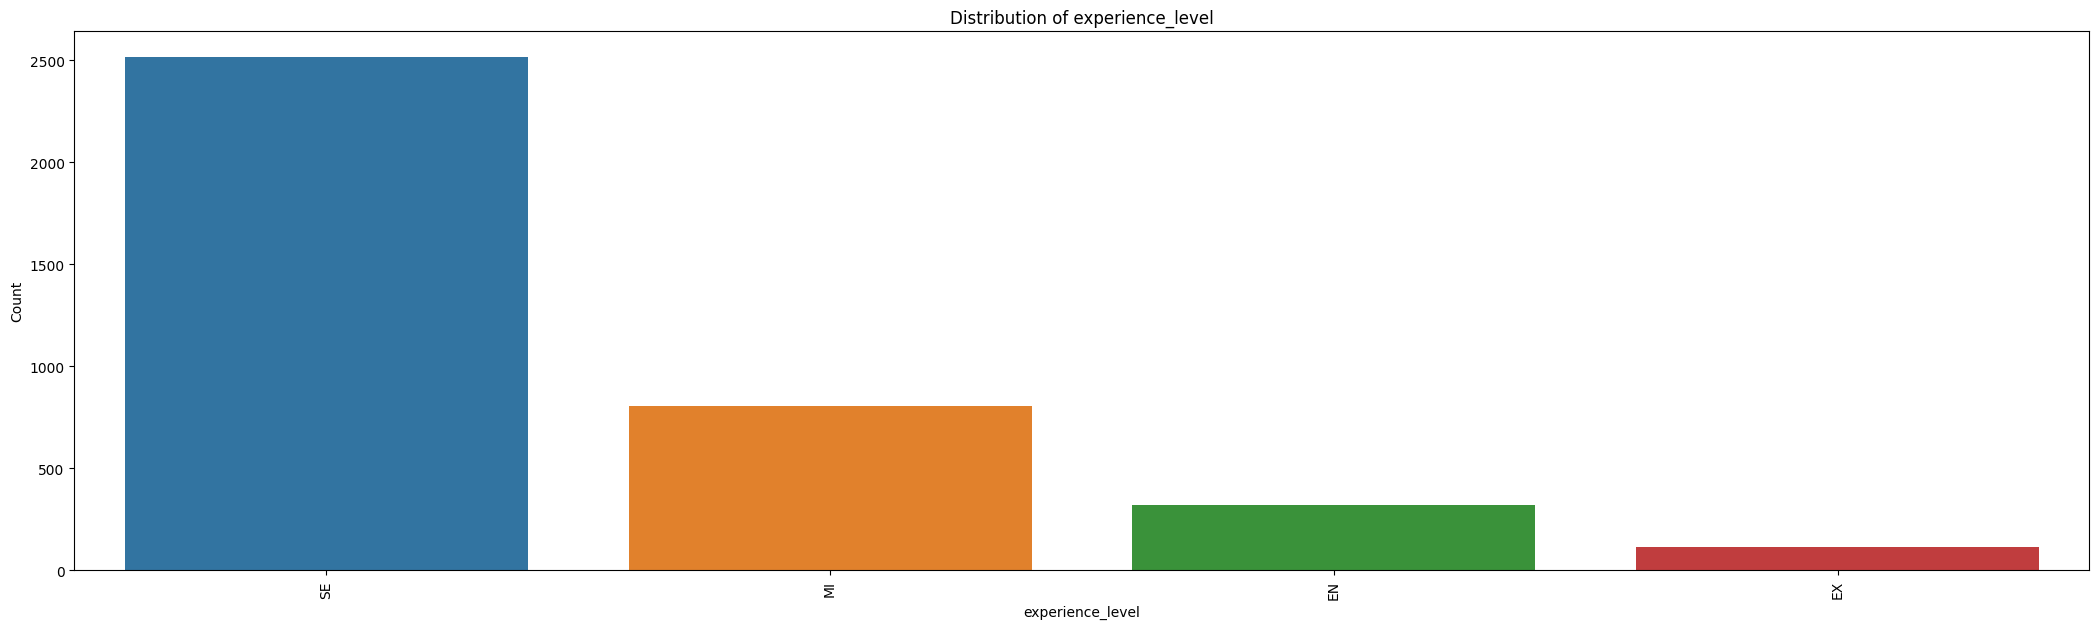

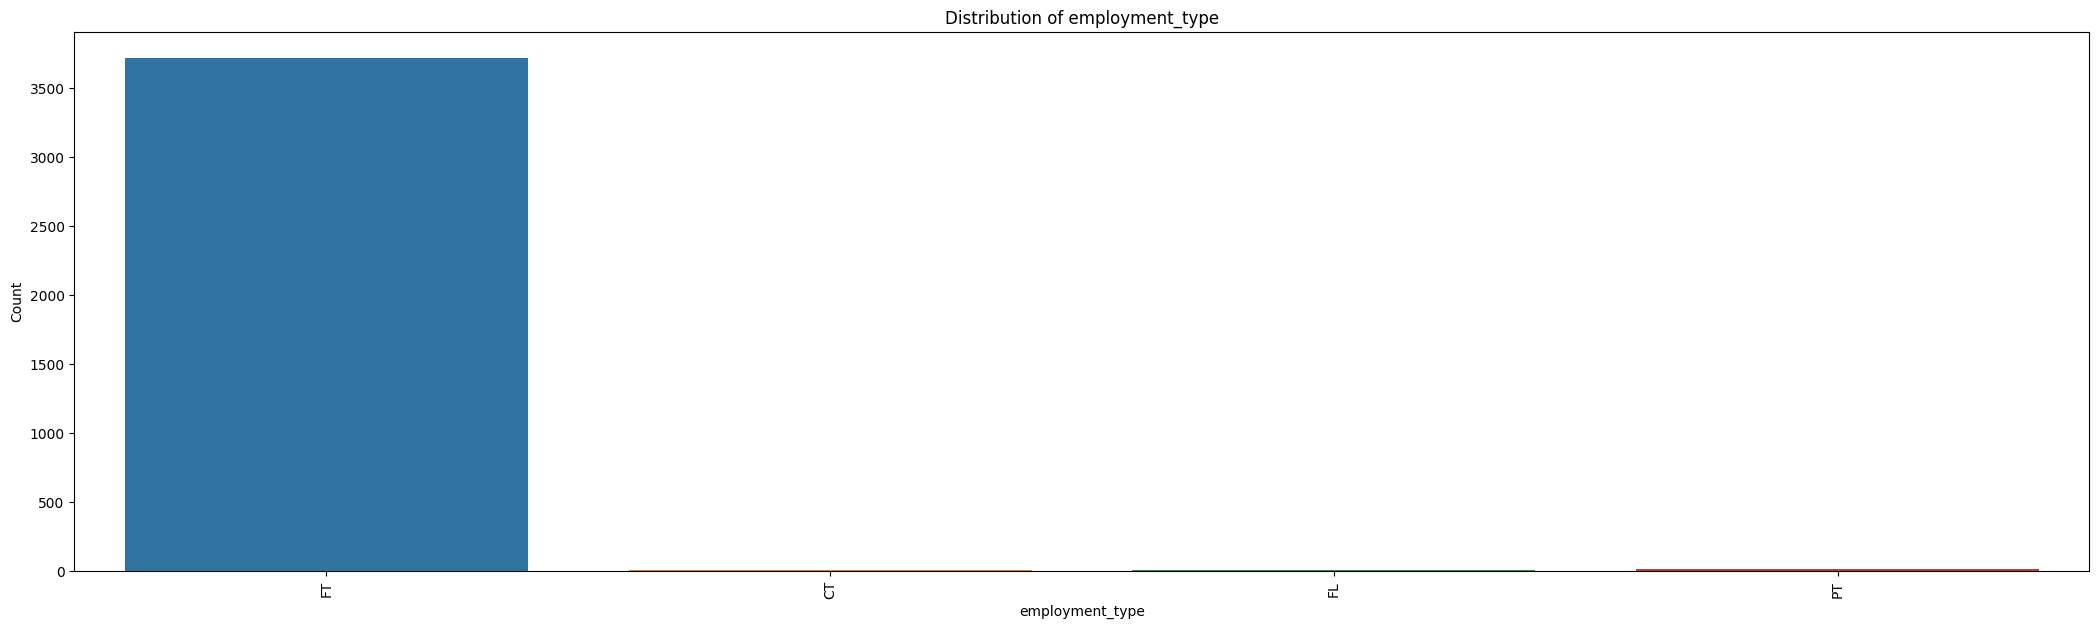

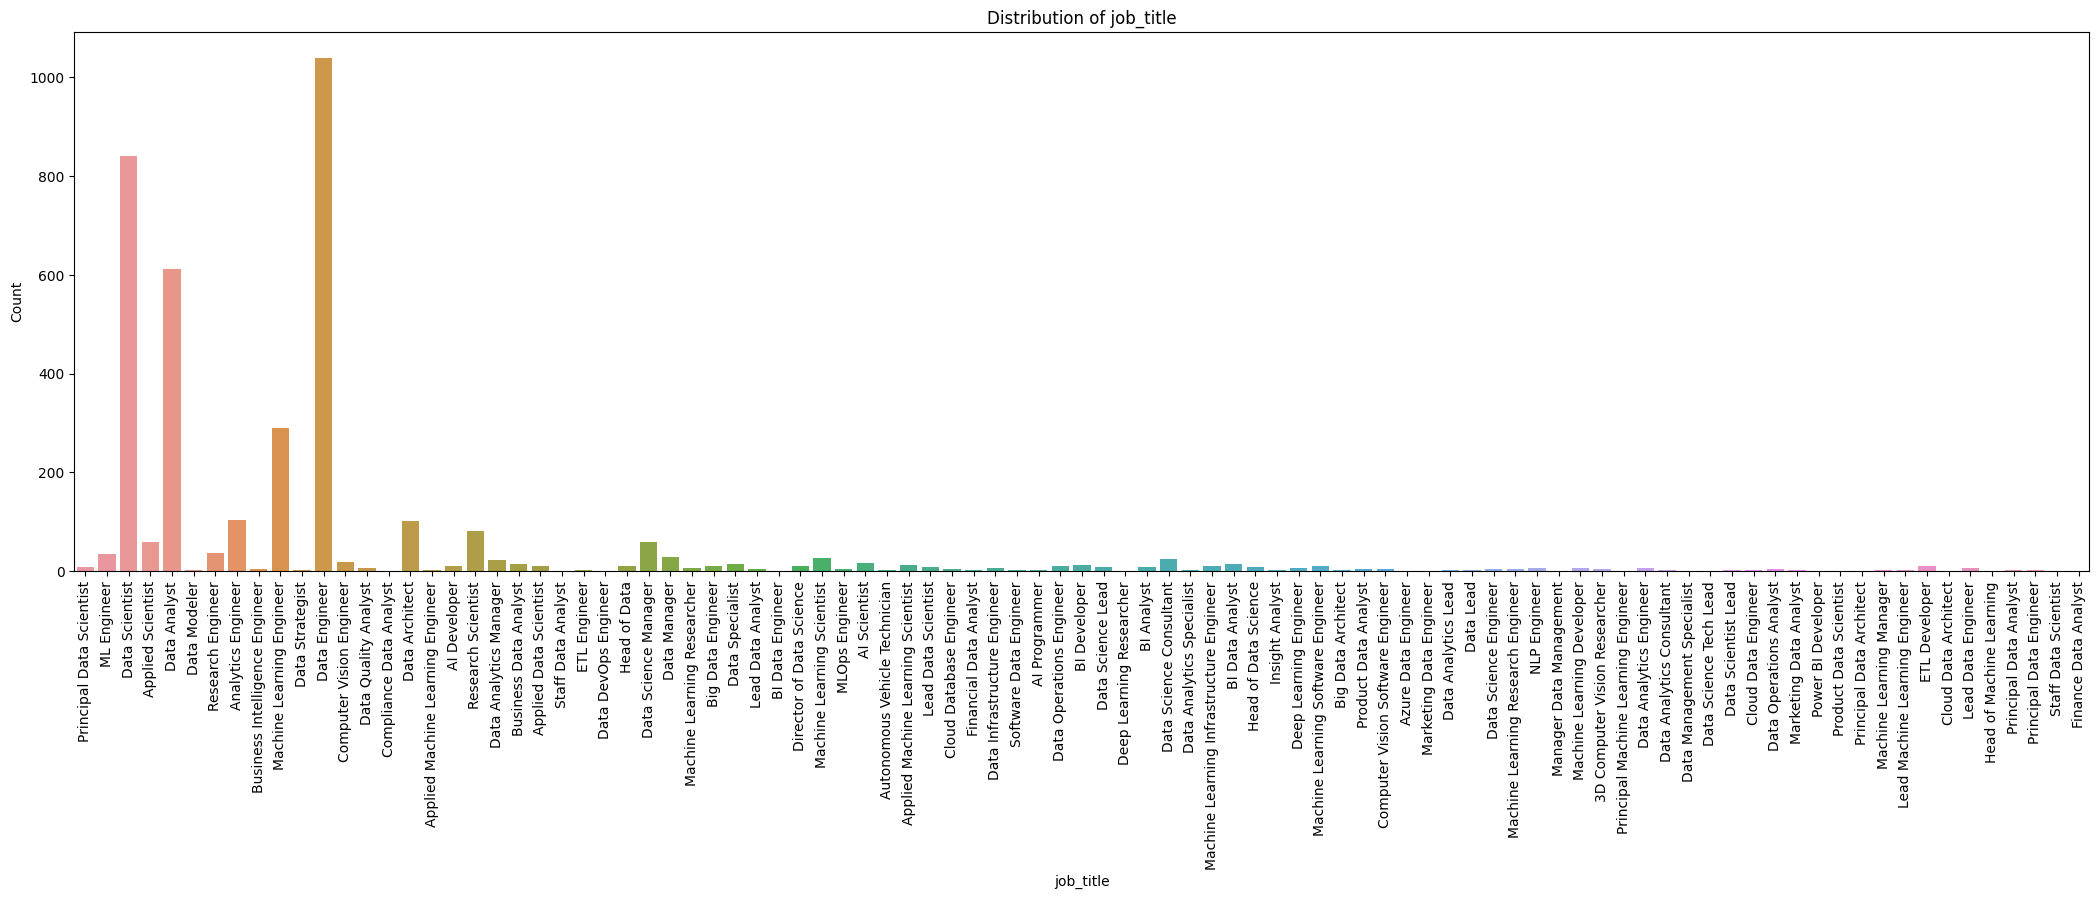

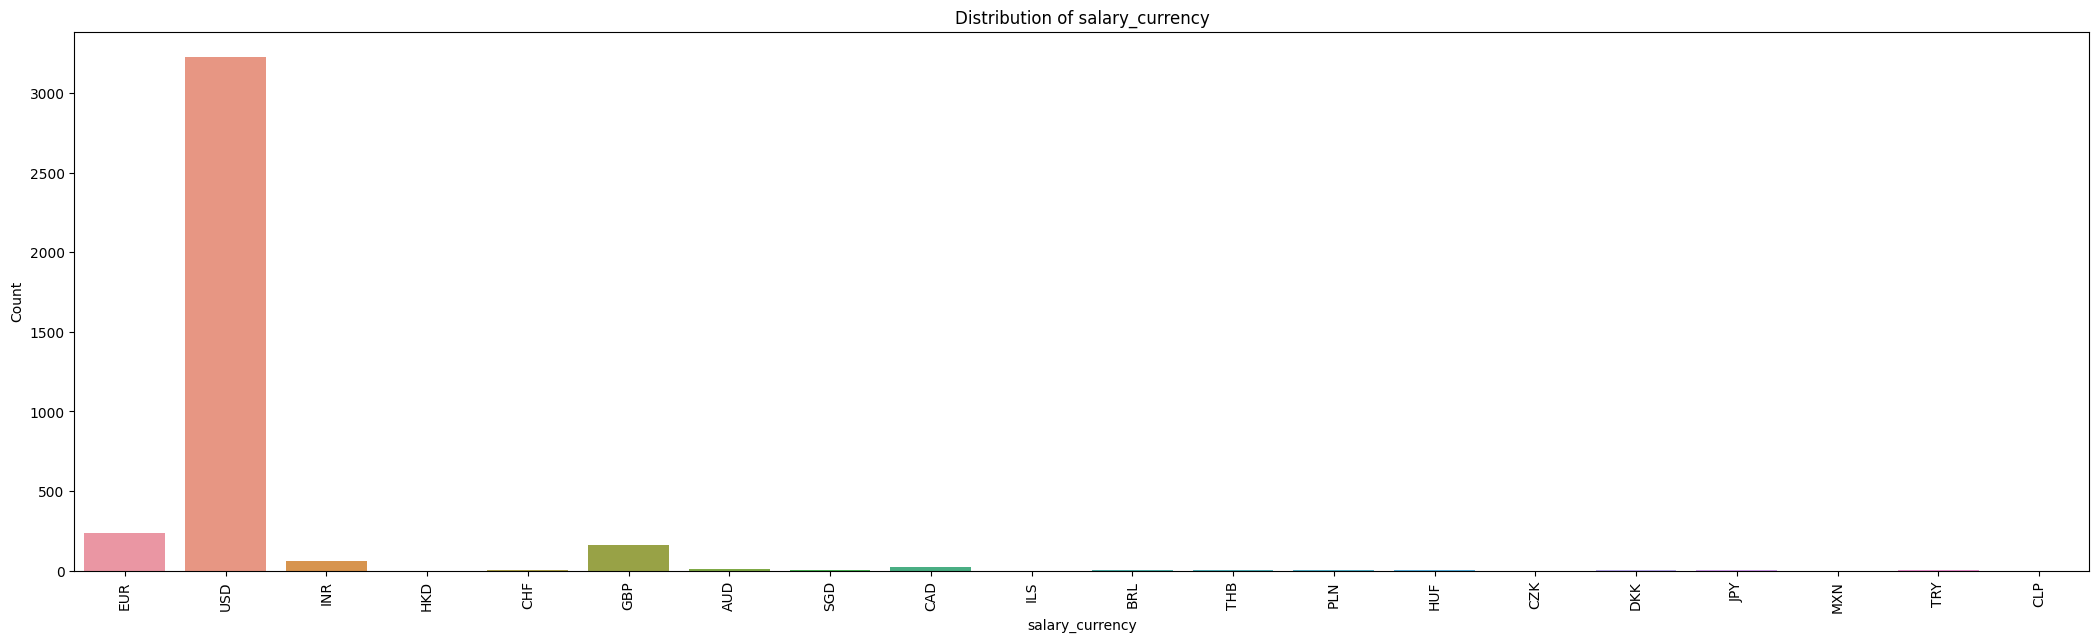

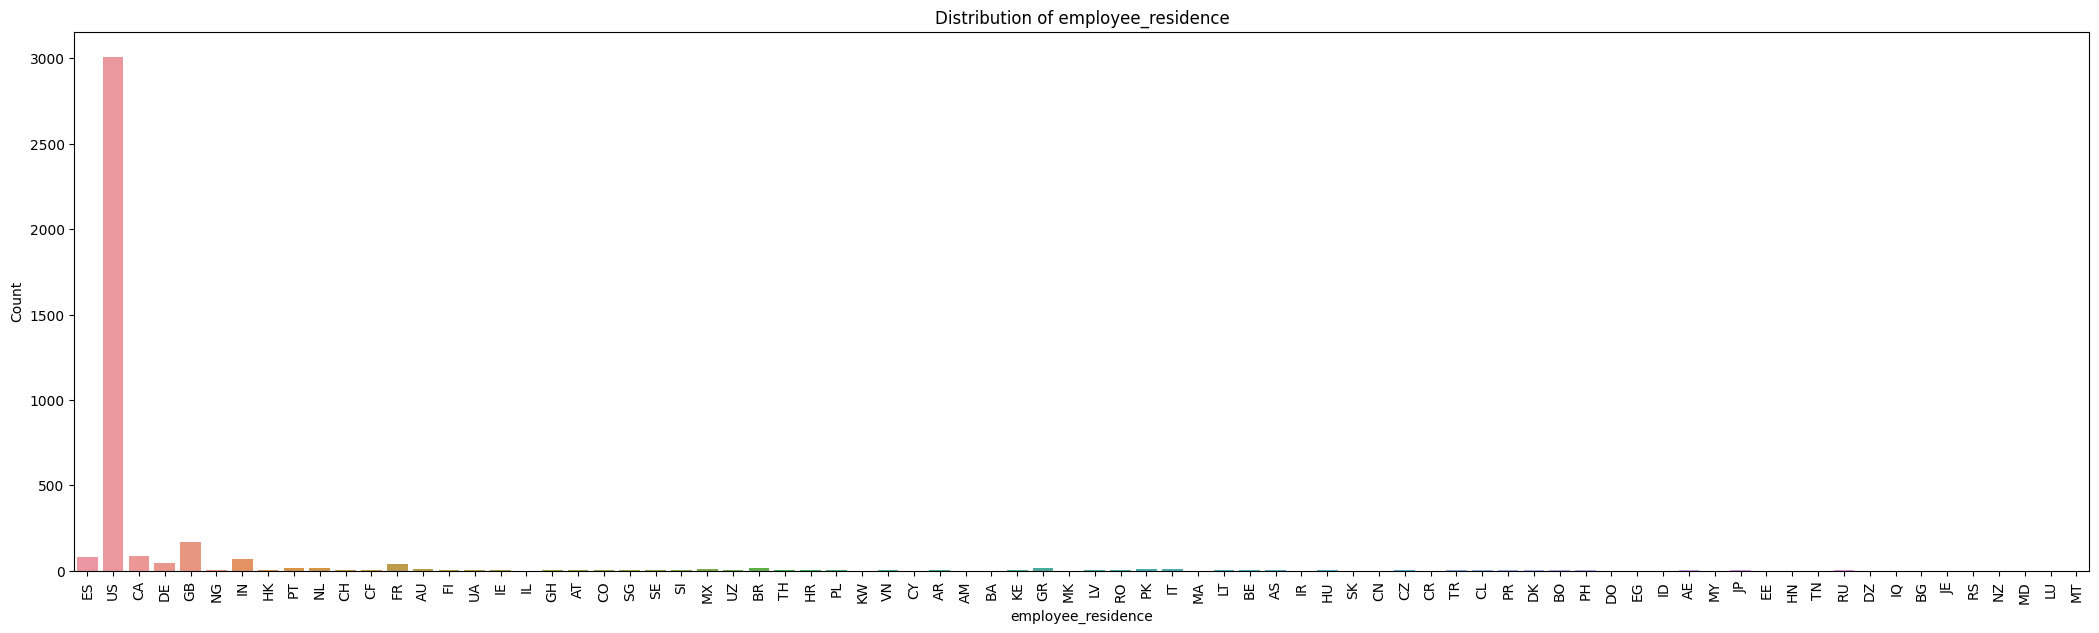

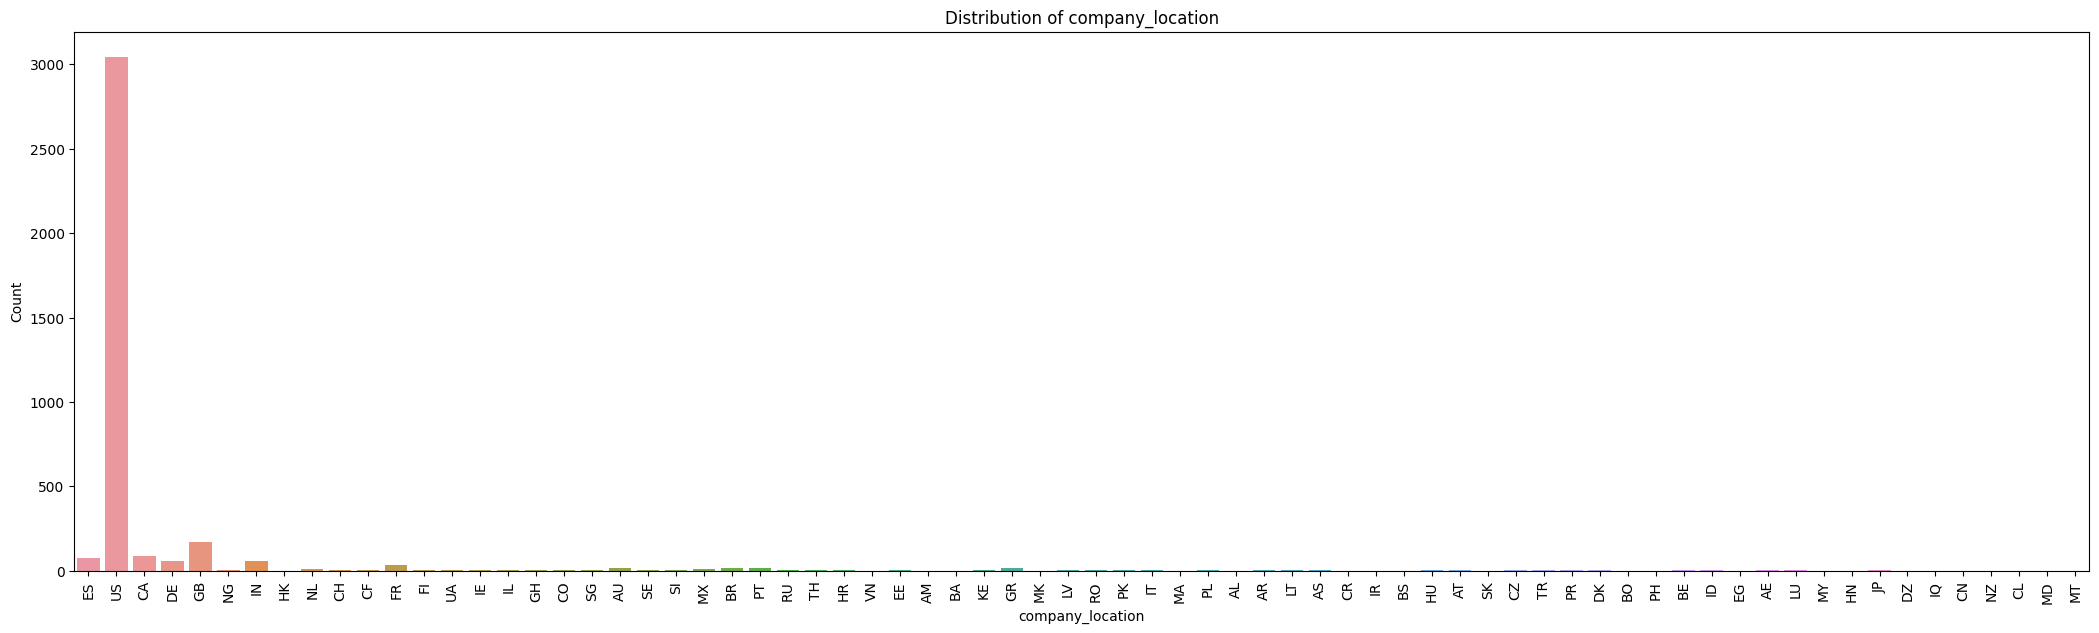

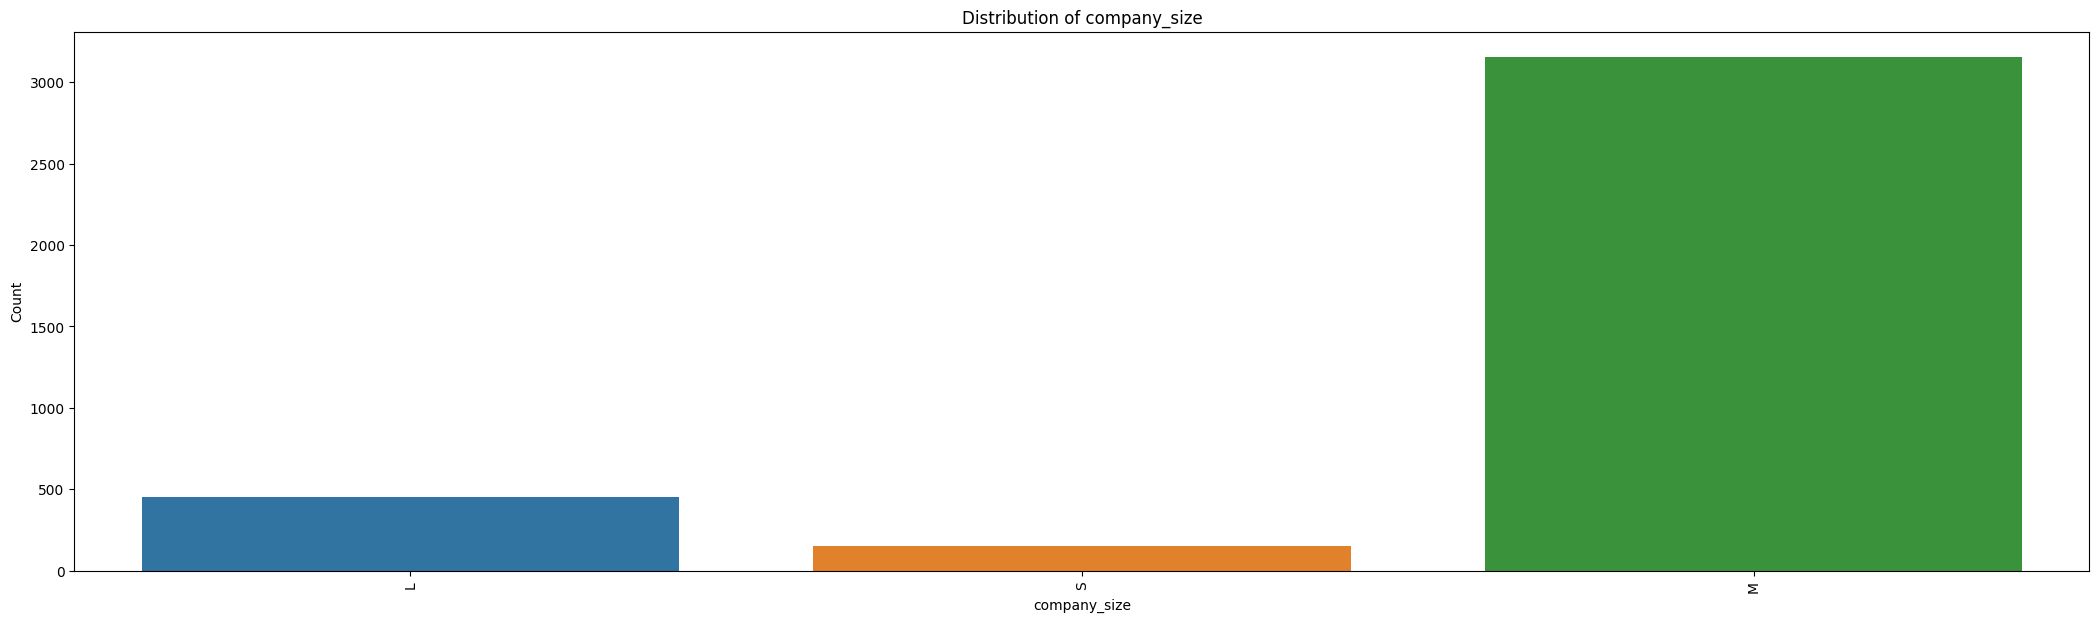

In [17]:
for cn in df.select_dtypes(include=[pd.Categorical]):
  plt.figure(figsize=(26, 7))
  chart = sns.countplot(x=cn, data=df)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.xlabel(cn)
  plt.ylabel('Count')
  plt.title('Distribution of {}'.format(cn))
  plt.show()

Use scatter plots to show the relationship between two numerical variables.

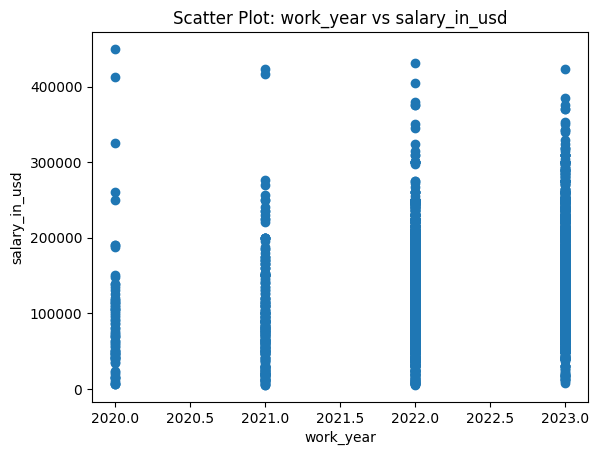

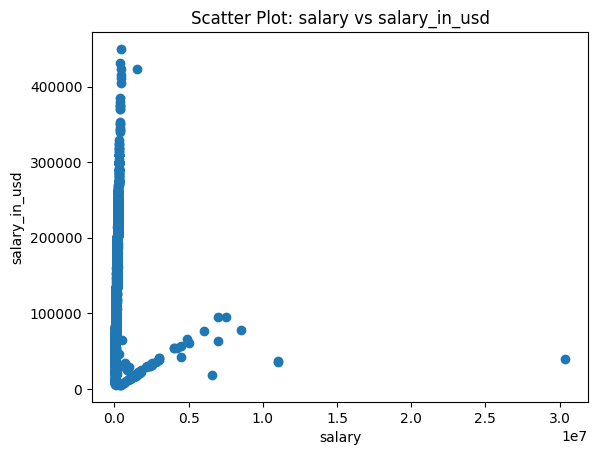

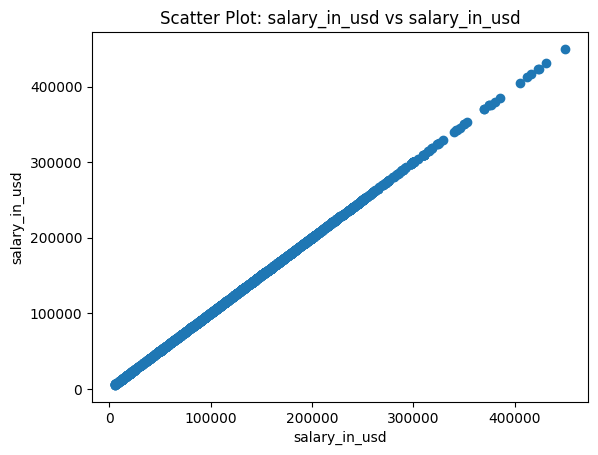

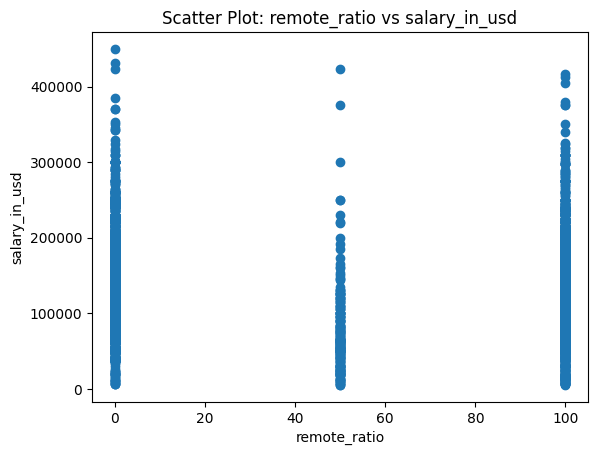

In [18]:
for cn in df.select_dtypes(include=[pd.Int64Dtype()]):
  plt.scatter(df[cn], df['salary_in_usd'])
  plt.xlabel(cn)
  plt.ylabel('salary_in_usd')
  plt.title('Scatter Plot: {} vs salary_in_usd'.format(cn))
  plt.show()

Use box plots to compare the distribution of a numerical variable across different categories.

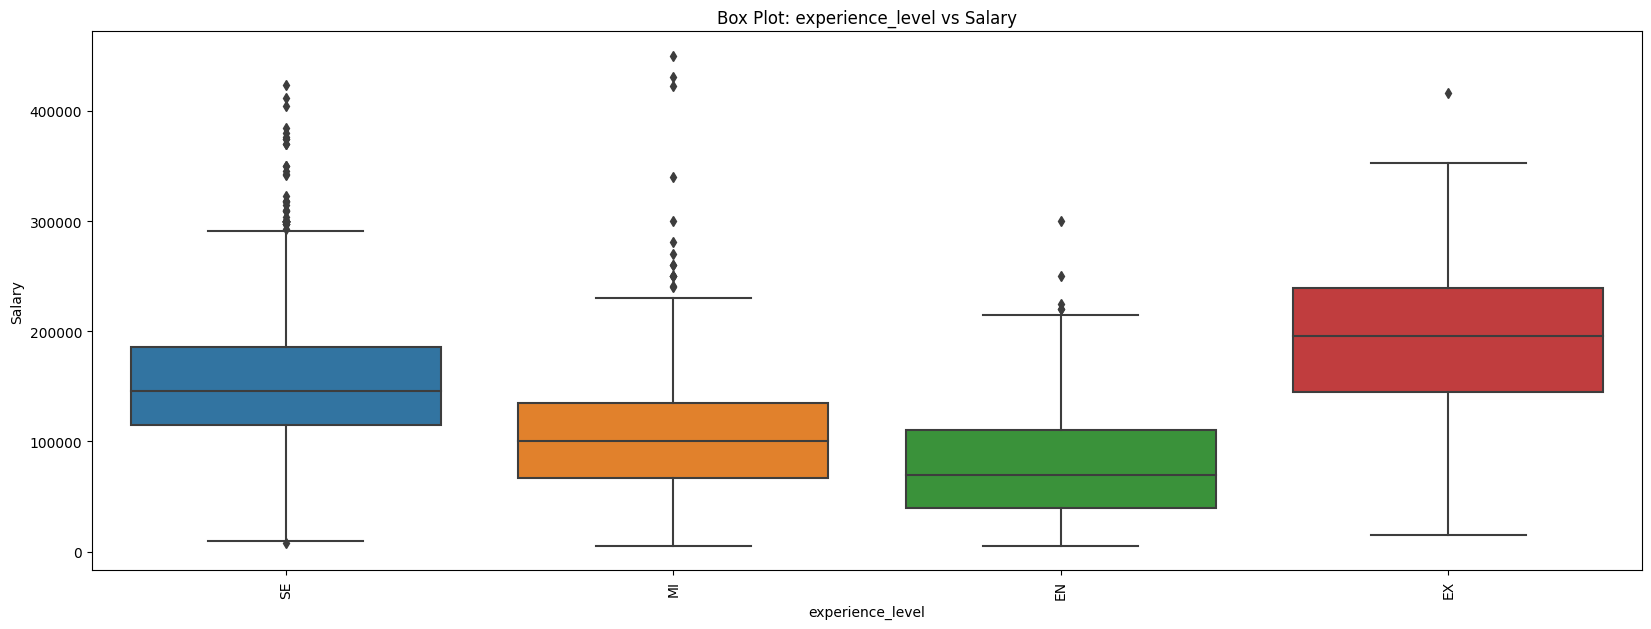

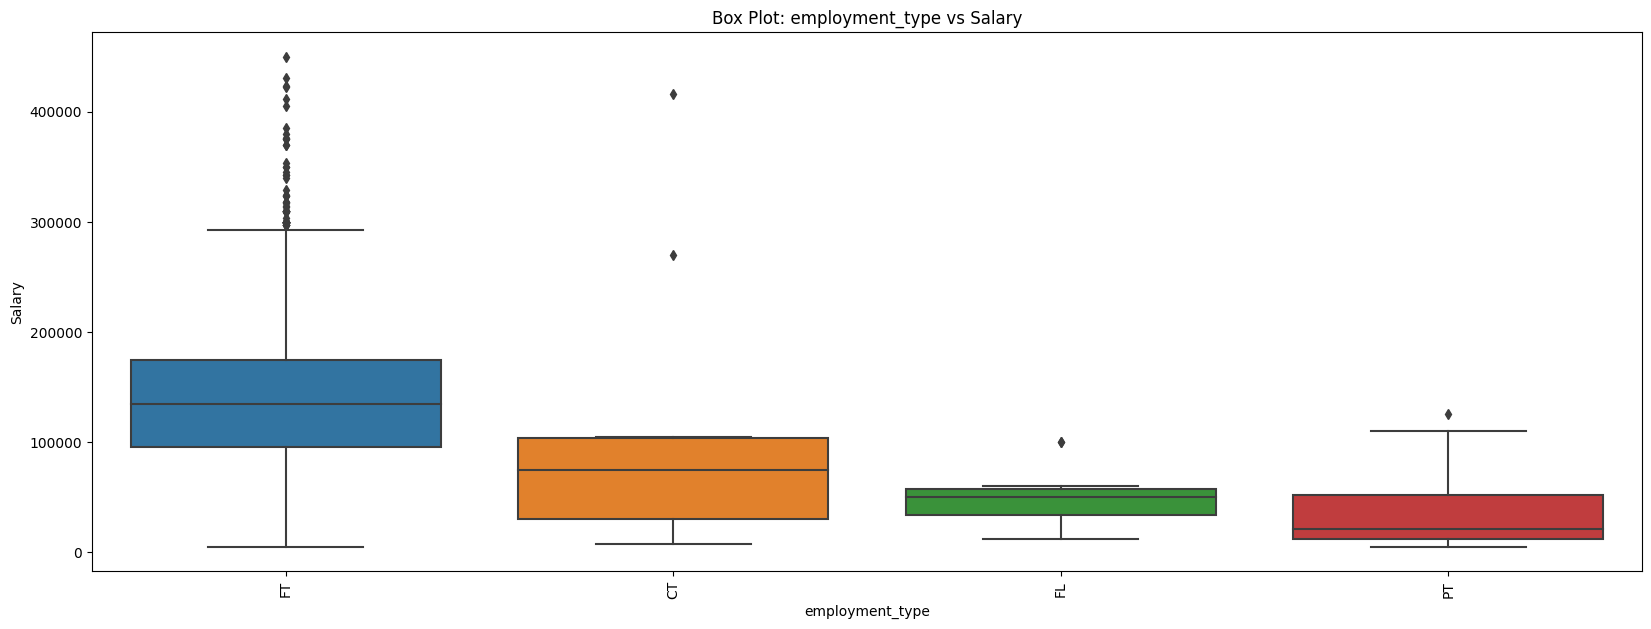

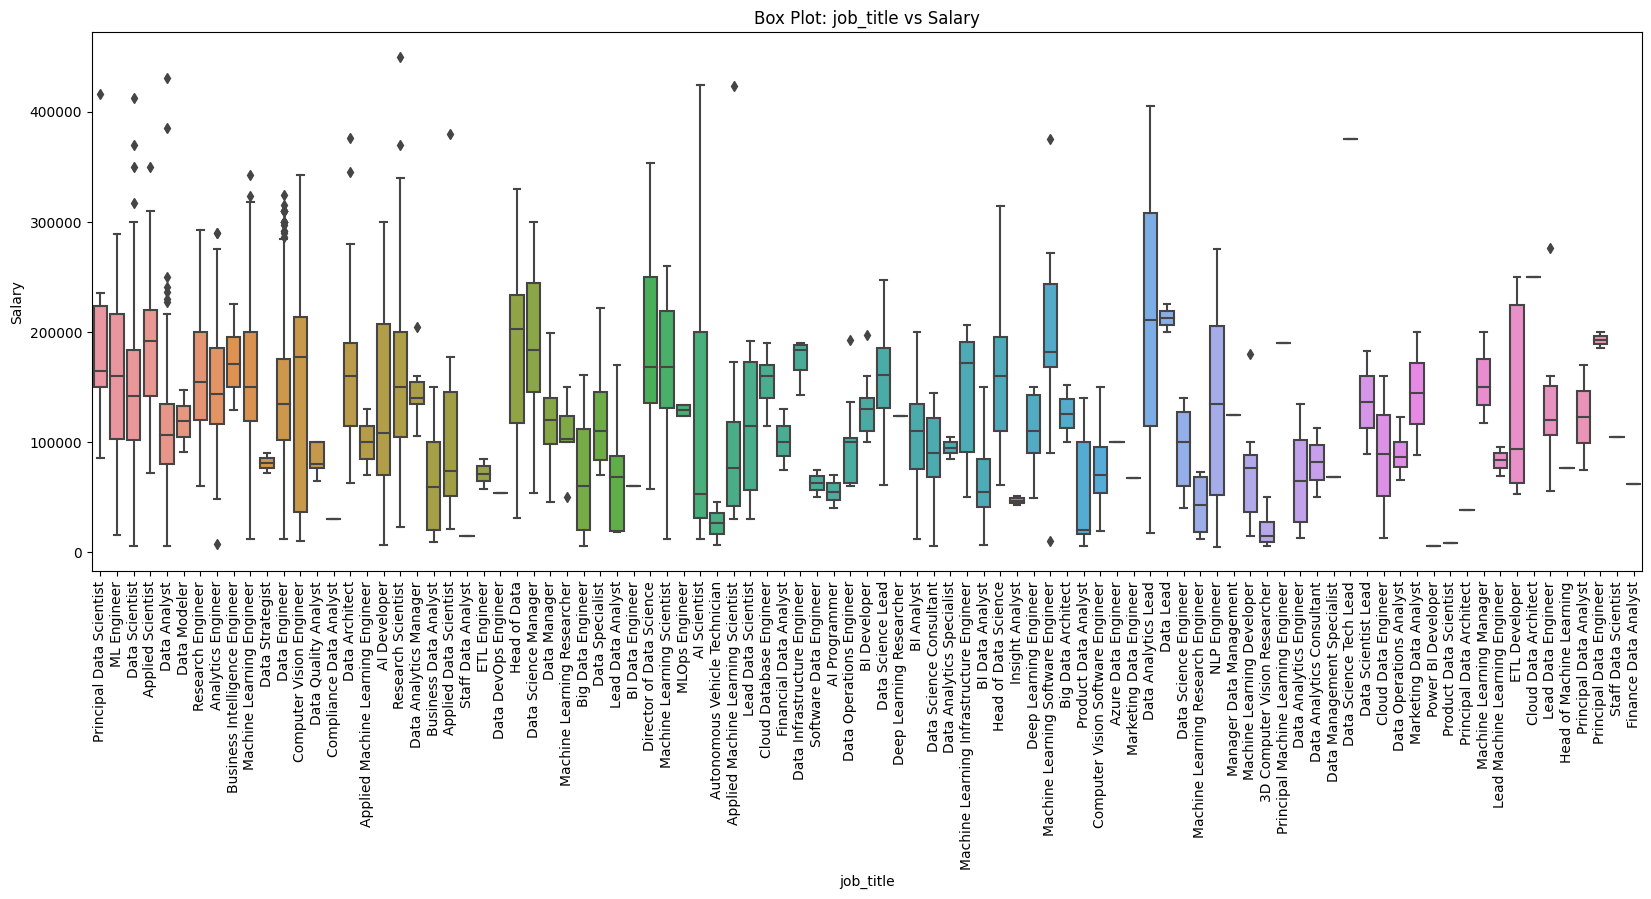

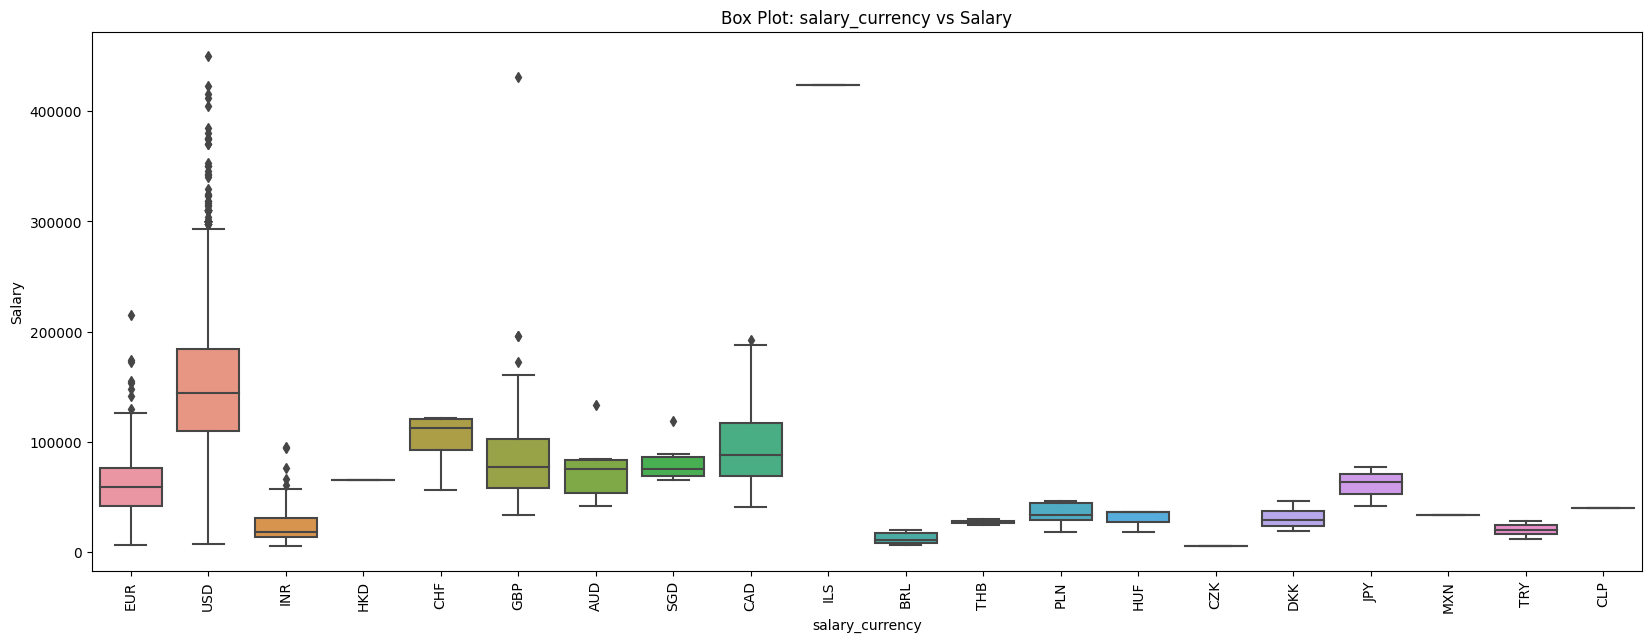

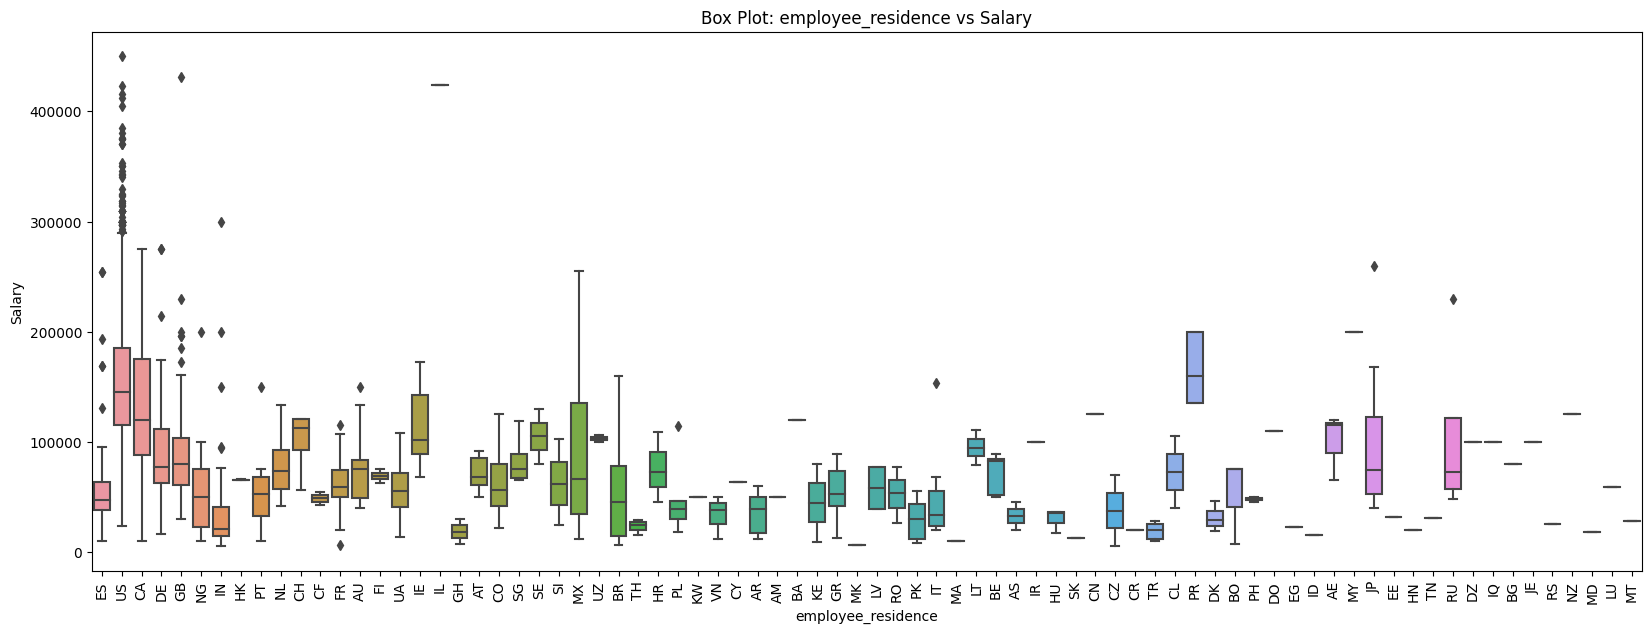

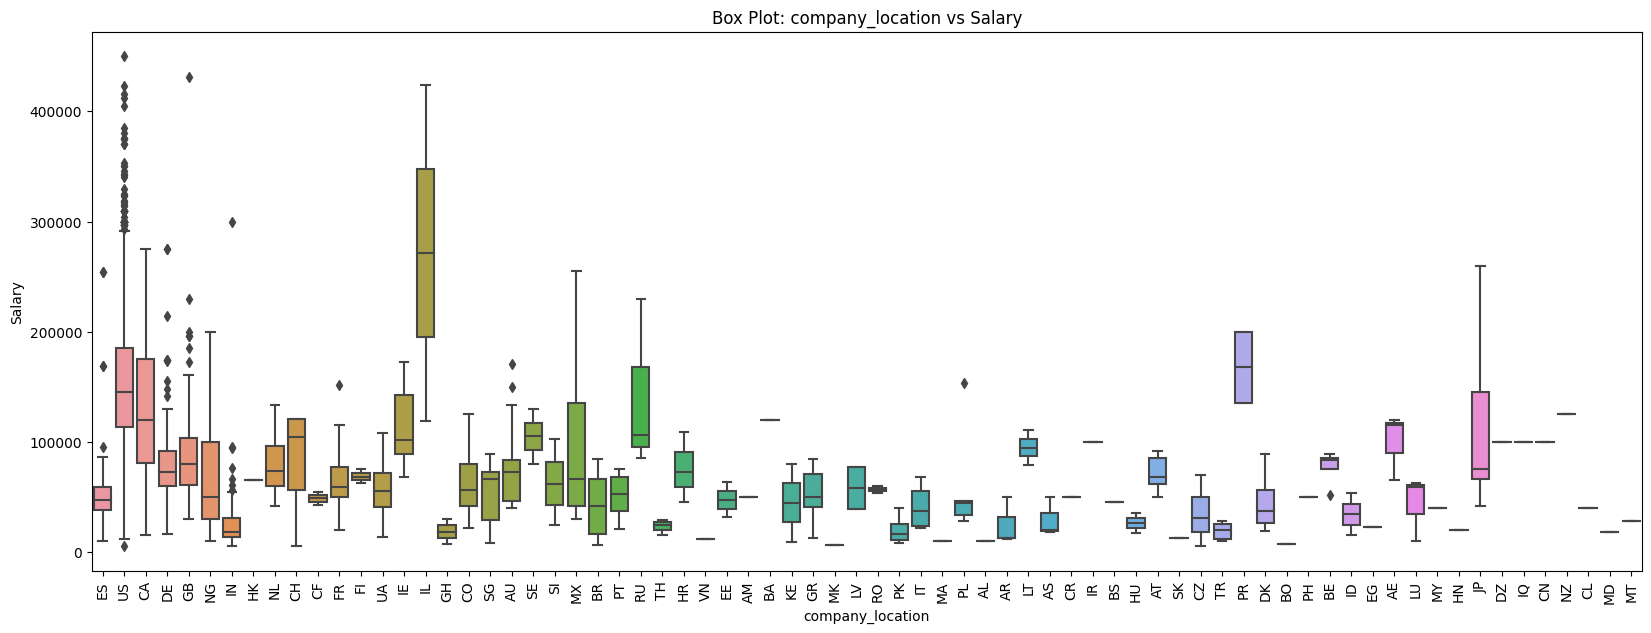

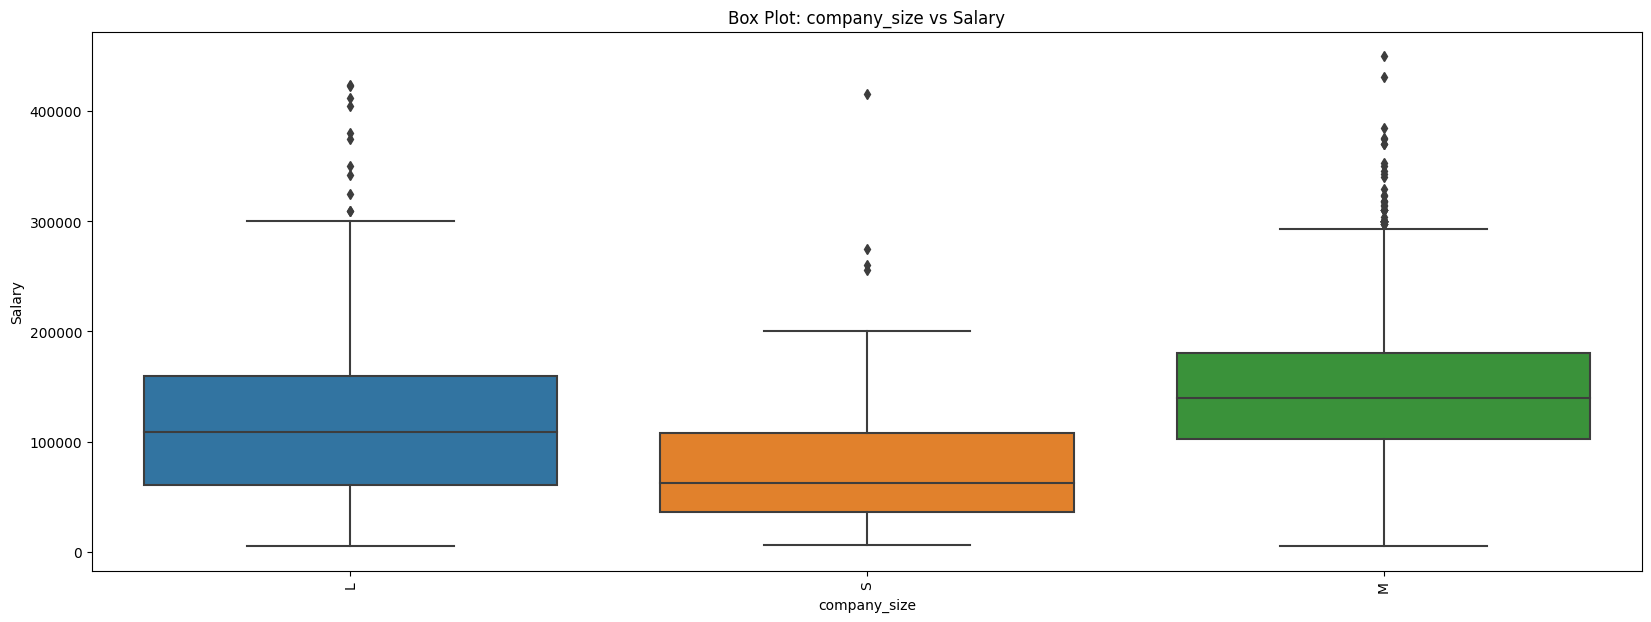

In [19]:
for cn in df.select_dtypes(include=[pd.Categorical]):
  plt.figure(figsize=(20, 7))
  chart = sns.boxplot(x=cn, y='salary_in_usd', data=df)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.xlabel(cn)
  plt.ylabel('Salary')
  plt.title('Box Plot: {} vs Salary'.format(cn))
  plt.show()

Use heatmaps to visualize the correlation between numerical variables.

<ipython-input-20-7ca1085ff5bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


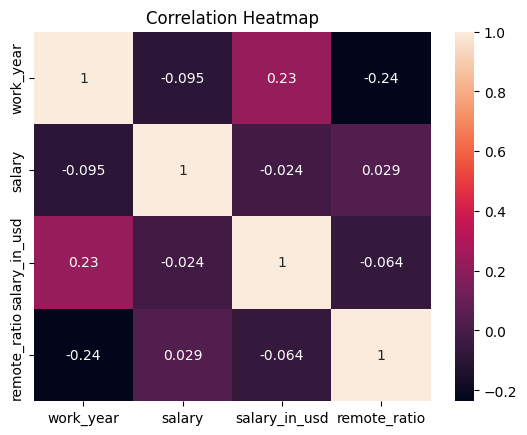

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Use 3D scatter plots to show the relationship between three numerical variables.

In [22]:
import plotly.express as px

In [24]:
fig = px.scatter_3d(df, x='work_year', y='salary_in_usd', z='salary')
fig.show()

Now, our next step would be to convert the categorical data into numerical form so that we can perform a correlation operation between them.

In [25]:
# See how many unique 'experience_level' categories are present.
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [26]:
# See how many unique 'employment_type' categories are present.
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [27]:
# See how many unique 'company_size' categories are present.
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [33]:
EXPERIENCE_LEVEL_EX = 0
EXPERIENCE_LEVEL_EN = 1
EXPERIENCE_LEVEL_MI = 2
EXPERIENCE_LEVEL_SE = 3

EMPLOYMENT_TYPE_FL = 0
EMPLOYMENT_TYPE_PT = 1
EMPLOYMENT_TYPE_CT = 2
EMPLOYMENT_TYPE_FT = 3

COMPANY_SIZE_S = 0
COMPANY_SIZE_M = 1
COMPANY_SIZE_L = 2

In [34]:
# Define mapping dictionaries for each categorical variable
experience_level_mapping = {
    'SE': EXPERIENCE_LEVEL_SE,
    'MI': EXPERIENCE_LEVEL_MI,
    'EN': EXPERIENCE_LEVEL_EN,
    'EX': EXPERIENCE_LEVEL_EN
  }
employment_type_mapping = {
    'FT': EMPLOYMENT_TYPE_FT,
    'CT': EMPLOYMENT_TYPE_CT,
    'FL': EMPLOYMENT_TYPE_FL,
    'PT': EMPLOYMENT_TYPE_PT
  }
company_size_mapping = {
    'L': COMPANY_SIZE_L,
    'S': COMPANY_SIZE_S,
    'M': COMPANY_SIZE_M
  }

In [35]:
# Replace categorical values with numerical codes
df['experience_level'] = df['experience_level'].replace(experience_level_mapping)
df['employment_type'] = df['employment_type'].replace(employment_type_mapping)
df['company_size'] = df['company_size'].replace(company_size_mapping)

In [36]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,Principal Data Scientist,80000,EUR,85847,ES,100,ES,0
1,2023,1,1,ML Engineer,30000,USD,30000,US,100,US,1
2,2023,1,1,ML Engineer,25500,USD,25500,US,100,US,1
3,2023,0,0,Data Scientist,175000,USD,175000,CA,100,CA,2
4,2023,0,0,Data Scientist,120000,USD,120000,CA,100,CA,2


Now using heatmaps to visualize the correlation between numerical vairables.

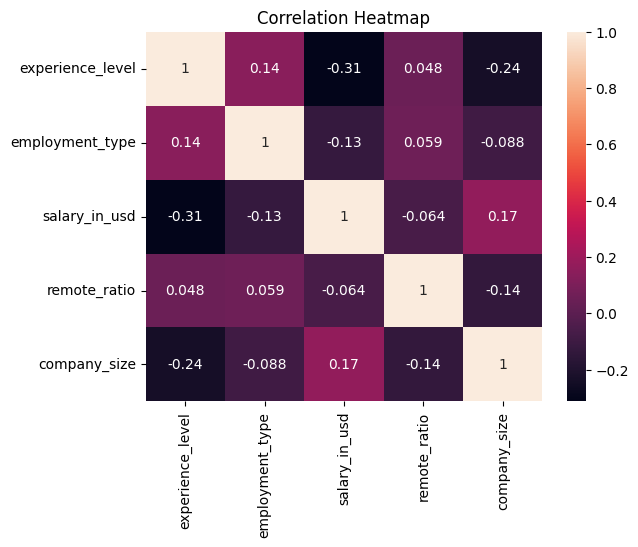

In [38]:
correlation_matrix = df[['experience_level', 'employment_type', 'salary_in_usd',
                         'remote_ratio', 'company_size']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()